In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
#Pivot we created from lesson 6:
df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot = df_US_pivot.reset_index()
df_US_pivot['job_posted_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot = df_US_pivot.sort_values('job_posted_month_no')
df_US_pivot = df_US_pivot.set_index('job_posted_month')
df_US_pivot = df_US_pivot.drop(columns='job_posted_month_no')

df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [4]:
pd.read_csv("https://lukeb.co/software_csv")

,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,13619,9827,5108,4348
1,February,11456,9116,7298,4284
2,March,11102,8178,5814,4159
3,April,14037,9209,7232,4220
4,May,12126,8864,6718,4980
5,June,12003,8065,5902,4781
6,July,11914,8061,6839,4344
7,August,11571,8191,7413,4104
8,September,14016,8447,6139,4094
9,October,11419,8476,5026,4389


In [5]:
#need to index the new dataframe and assign the dataframe to a variable:
df_US_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [6]:
#now we can merge the two pivots on the index of month.  We will merge the new pivot into the old pivot:
df_US_pivot.merge(df_US_software_pivot, on='job_posted_month')


,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [7]:
#Set the merged pivot to a variable:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on='job_posted_month')

In [8]:
#sum the column of each job type to determine the total count to compare
top_5 = df_US_merged.sum()

top_5

Business Analyst               7382
Cloud Engineer                  423
Data Analyst                  67816
Data Engineer                 35080
Data Scientist                58830
Machine Learning Engineer       921
Senior Data Analyst           11791
Senior Data Engineer           9289
Senior Data Scientist         12946
Software Engineer              1814
Front-End Developer          151067
Back-End Developer           104700
Full-Stack Developer          75873
UI/UX Designer                52169
dtype: int64

In [9]:
#sum the column of each job type to determine the total count to compare, but we also need to sort:
top_5 = df_US_merged.sum().sort_values(ascending=False)

top_5

Front-End Developer          151067
Back-End Developer           104700
Full-Stack Developer          75873
Data Analyst                  67816
Data Scientist                58830
UI/UX Designer                52169
Data Engineer                 35080
Senior Data Scientist         12946
Senior Data Analyst           11791
Senior Data Engineer           9289
Business Analyst               7382
Software Engineer              1814
Machine Learning Engineer       921
Cloud Engineer                  423
dtype: int64

In [10]:
#sum the column of each job type to determine the total count to compare, but we also need to sort and then take the top 5
top_5 = df_US_merged.sum().sort_values(ascending=False).head()

top_5

Front-End Developer     151067
Back-End Developer      104700
Full-Stack Developer     75873
Data Analyst             67816
Data Scientist           58830
dtype: int64

In [11]:
#sum the column of each job type to determine the total count to compare, but we also need to sort and then take the top 5
top_5 = df_US_merged.sum().sort_values(ascending=False).head().index.to_list()

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

In [14]:
#using parentheses allows us to break out the same code by line and comment all the methods:
top_5 = (
    df_US_merged #merge
    .sum() #sum to get totals
    .sort_values(ascending=False) #sort values descending
    .head() #take the top 5
    .index.to_list() #turn the result into a list
    )

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

<Axes: xlabel='job_posted_month'>

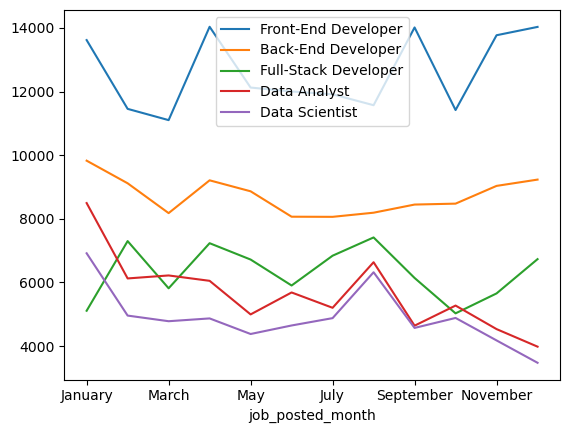

In [16]:
#Plot the result with a line graph
df_US_merged[top_5].plot(kind='line')

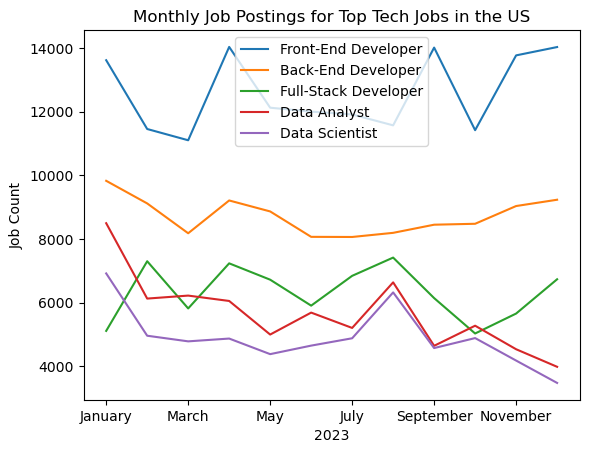

In [17]:
#Clean up the plot:
df_US_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

🟩 Merge US Jobs and Monthly Postings (2.7.1) - Problem
Pandas Merge DataFrames
Problem Statement:
Create a DataFrame df_us_jobs that contains job postings in the United States.
Then create another DataFrame df_monthly_postings that counts the number of job postings for each month.
Merge these two DataFrames on the job_posted_month column using a right join and display the first 5 rows of the resulting DataFrame.

In [24]:
df_us_jobs = df[df['job_country'] == 'United States'].copy()

In [ ]:
df_us_jobs

In [26]:
df_us_jobs['job_posted_month'] = df_us_jobs['job_posted_date'].dt.strftime('%B')

In [40]:
df_us_monthly_postings = df_us_jobs.groupby('job_posted_month')['job_posted_month'].size().reset_index(name='posting_count')
df_us_monthly_postings

,job_posted_month,posting_count
0,April,17282
1,August,21029
2,December,13153
3,February,18020
4,January,22670
5,July,16210
6,June,16694
7,March,17904
8,May,15283
9,November,14736


In [31]:
df_jobs = df.copy()
df_jobs['job_posted_month'] = df_jobs['job_posted_date'].dt.strftime('%B')

In [41]:
df_monthly_postings = df_jobs.groupby('job_posted_month')['job_posted_month'].size().reset_index(name='posting_count')
df_monthly_postings

,job_posted_month,posting_count
0,April,62919
1,August,75162
2,December,56303
3,February,64578
4,January,91822
5,July,63777
6,June,61572
7,March,64084
8,May,52104
9,November,64450


In [42]:
#merge the data sets
#df_monthly_postings_merged = df_us_monthly_postings.merge(df_monthly_postings, on='job_posted_month')
#df_us_monthly_postings.merge(df_monthly_postings, on='job_posted_month')
pd.merge(df_us_monthly_postings, df_monthly_postings, on='job_posted_month', how='right')

,job_posted_month,posting_count_x,posting_count_y
0,April,17282,62919
1,August,21029,75162
2,December,13153,56303
3,February,18020,64578
4,January,22670,91822
5,July,16210,63777
6,June,16694,61572
7,March,17904,64084
8,May,15283,52104
9,November,14736,64450


In [46]:
#Final Solution:
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')
df_us_jobs = df[df['job_country'] == 'United States']
df_monthly_postings = df.groupby('job_posted_month').size().reset_index(name='postings_count')
merged_df = pd.merge(df_us_jobs, df_monthly_postings, on='job_posted_month', how='right')
merged_df.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,postings_count
0,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",2023-01,91822
1,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023-01,91822
2,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,91822
3,Data Engineer,Data Engineer,"Cincinnati, OH",via SimplyHired,Full-time,False,"Texas, United States",2023-01-22 13:08:53,False,False,United States,None,NaN,NaN,Divisions Maintenance Group,"['sql', 'nosql', 'python', 'java', 'c++', 'sca...","{'databases': ['cassandra'], 'libraries': ['ha...",2023-01,91822
4,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"['sql', 'python', 'unix', 'excel', 'jira']","{'analyst_tools': ['excel'], 'async': ['jira']...",2023-01,91822


In [6]:
#get month into the dataframe
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')

#create a dataframe filtered on us jobs
df_us_jobs = df[df['job_country'] == 'United States']

#create a dataframe that has a group by for ALL jobs by month
df_monthly_postings = df.groupby('job_posted_month').size().reset_index(name='posting_count')

#merge the dataframes
df_merged = pd.merge(df_us_jobs, df_monthly_postings, on='job_posted_month', how='right')

df_merged.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,posting_count
0,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",2023-01,91822
1,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023-01,91822
2,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,91822
3,Data Engineer,Data Engineer,"Cincinnati, OH",via SimplyHired,Full-time,False,"Texas, United States",2023-01-22 13:08:53,False,False,United States,None,NaN,NaN,Divisions Maintenance Group,"['sql', 'nosql', 'python', 'java', 'c++', 'sca...","{'databases': ['cassandra'], 'libraries': ['ha...",2023-01,91822
4,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"['sql', 'python', 'unix', 'excel', 'jira']","{'analyst_tools': ['excel'], 'async': ['jira']...",2023-01,91822


In [7]:
#get month into the dataframe
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')

#create a dataframe filtered on us jobs
df_us_jobs = df[df['job_country'] == 'United States']

#create a dataframe that has a group by for ALL jobs by month
df_monthly_postings = df.groupby('job_posted_month').size().reset_index(name='posting_count')

#merge the dataframes
df_merged = pd.merge(df_monthly_postings, df_us_jobs, on='job_posted_month', how='left')

df_merged.head()

,job_posted_month,posting_count,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,2023-01,91822,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}"
1,2023-01,91822,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']..."
2,2023-01,91822,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
3,2023-01,91822,Data Engineer,Data Engineer,"Cincinnati, OH",via SimplyHired,Full-time,False,"Texas, United States",2023-01-22 13:08:53,False,False,United States,None,NaN,NaN,Divisions Maintenance Group,"['sql', 'nosql', 'python', 'java', 'c++', 'sca...","{'databases': ['cassandra'], 'libraries': ['ha..."
4,2023-01,91822,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"['sql', 'python', 'unix', 'excel', 'jira']","{'analyst_tools': ['excel'], 'async': ['jira']..."


In [9]:
#get month into the dataframe
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')

#create a dataframe filtered on us jobs
df_us_jobs = df[df['job_country'] == 'United States']

#create a dataframe that has a group by for ALL jobs by month
df_monthly_postings = df.groupby('job_posted_month').size().reset_index(name='posting_count')

#merge the dataframes
df_merged = pd.merge(df_us_jobs, df_monthly_postings, on='job_posted_month', how='right')

df_merged.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,posting_count
0,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",2023-01,91822
1,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023-01,91822
2,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,91822
3,Data Engineer,Data Engineer,"Cincinnati, OH",via SimplyHired,Full-time,False,"Texas, United States",2023-01-22 13:08:53,False,False,United States,None,NaN,NaN,Divisions Maintenance Group,"['sql', 'nosql', 'python', 'java', 'c++', 'sca...","{'databases': ['cassandra'], 'libraries': ['ha...",2023-01,91822
4,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"['sql', 'python', 'unix', 'excel', 'jira']","{'analyst_tools': ['excel'], 'async': ['jira']...",2023-01,91822


In [53]:
#get month into the dataframe
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')

#create a dataframe filtered on us jobs
df_us_jobs = df[df['job_country'] == 'United States']

#create a dataframe that has a group by for ALL jobs by month
df_monthly_postings = df.groupby('job_posted_month').size().reset_index(name='posting_count')

#merge the dataframes
df_merged = pd.merge(df_us_jobs, df_monthly_postings, on='job_posted_month')

df_merged

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,posting_count
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023-06,61572
1,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07,63777
2,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",2023-11,64450
3,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",2023-03,64084
4,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",2023-04,62919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206287,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None,2023-10,66611
206288,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",2023-07,63777
206289,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}",2023-04,62919
206290,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,2023-01,91822


In [54]:
## Filter for Data Analysts
df_DA = df[(df['job_title_short'] == 'Data Analyst')].copy()

## Create a column for month
df_DA['month'] = df_DA['job_posted_date'].dt.month

## Pivot table to count job postings by month
df_DA_pivot = df_DA.pivot_table(index='month', aggfunc='count')['job_title_short']

## Print the pivot table
df_DA_pivot

month
1     23585
2     16558
3     16243
4     15514
5     13423
6     16008
7     16095
8     18628
9     14969
10    16239
11    15230
12    13583
Name: job_title_short, dtype: int64

In [55]:
## Filter for Senior Data Analysts
df_SDA = df[(df['job_title_short'] == 'Senior Data Analyst')].copy()

## Create a column for month
df_SDA['month'] = df_SDA['job_posted_date'].dt.month

## Pivot table to count job postings by month
df_SDA_pivot = df_SDA.pivot_table(index='month', aggfunc='count')['job_title_short']

## Print the pivot table
df_SDA_pivot

month
1     3696
2     2713
3     2454
4     2351
5     1925
6     2319
7     2380
8     2951
9     2194
10    2317
11    2117
12    1799
Name: job_title_short, dtype: int64

In [58]:
## Merge the two pivot tables
merged_DA_pivot = pd.merge(df_DA_pivot, df_SDA_pivot,on='month')

#merged_DA_pivot = pd.merge(df_DA_pivot, df_SDA_pivot, how='outer', left_index=True, right_index=True)
#merged_DA_pivot.columns = ['DA_count', 'SDA_count']
merged_DA_pivot.columns = ['DA count', 'SDA count']

merged_DA_pivot

,DA count,SDA count
month,,
1,23585,3696
2,16558,2713
3,16243,2454
4,15514,2351
5,13423,1925
6,16008,2319
7,16095,2380
8,18628,2951
9,14969,2194


In [10]:
#get month into the dataframe
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')

#create a dataframe filtered on us jobs
df_us_jobs = df[df['job_country'] == 'United States']

#create a dataframe that has a group by for ALL jobs by month
df_monthly_postings = df.groupby('job_posted_month').size().reset_index(name='posting_count')

In [11]:
df_monthly_postings.head()

,job_posted_month,posting_count
0,2023-01,91822
1,2023-02,64578
2,2023-03,64084
3,2023-04,62919
4,2023-05,52104


🟨 Merge Non-Remote Jobs and Salary (2.7.2) - Problem
Pandas Merge DataFrames
Problem Statement:
Create a DataFrame df_not_remote_jobs that filters job postings that do not offer remote work.
Then create another DataFrame df_not_remote_salary that calculates the average yearly salary for these non-remote jobs. Rename this salary column salary_not_remote_avg.
Merge these two DataFrames on the job_title_short column using a right join and display the first 5 rows of the resulting DataFrame.

In [ ]:
#get month into the dataframe
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')

#create a dataframe filtered on us jobs
df_us_jobs = df[df['job_country'] == 'United States']

#create a dataframe that has a group by for ALL jobs by month
df_monthly_postings = df.groupby('job_posted_month').size().reset_index(name='posting_count')

#merge the dataframes
df_merged = pd.merge(df_us_jobs, df_monthly_postings, on='job_posted_month', how='right')

df_merged.head()

In [13]:
df.head(1)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023-06


In [14]:
#create a dataframe of jobs that are NOT work from home
df_not_remote_jobs = df[df['job_work_from_home'] == False]

In [17]:
#create a dataframe of average yearly salare of the non-remote jobs
df_not_remote_jobs.groupby('job_title_short')['salary_year_avg'].mean()

job_title_short
Business Analyst              90177.419940
Cloud Engineer               105508.026786
Data Analyst                  93754.956809
Data Engineer                129747.517613
Data Scientist               134405.937420
Machine Learning Engineer    125163.597015
Senior Data Analyst          114051.799273
Senior Data Engineer         145330.070790
Senior Data Scientist        151774.688222
Software Engineer            111894.697884
Name: salary_year_avg, dtype: float64

In [19]:
df_not_remote_salary = df_not_remote_jobs.groupby('job_title_short')['salary_year_avg'].mean()

In [25]:
df_not_remote_salary

job_title_short
Business Analyst              90177.419940
Cloud Engineer               105508.026786
Data Analyst                  93754.956809
Data Engineer                129747.517613
Data Scientist               134405.937420
Machine Learning Engineer    125163.597015
Senior Data Analyst          114051.799273
Senior Data Engineer         145330.070790
Senior Data Scientist        151774.688222
Software Engineer            111894.697884
Name: salary_year_avg, dtype: float64

In [30]:
df_not_remote_salary.rename('salary_not_remote_avg')

job_title_short
Business Analyst              90177.419940
Cloud Engineer               105508.026786
Data Analyst                  93754.956809
Data Engineer                129747.517613
Data Scientist               134405.937420
Machine Learning Engineer    125163.597015
Senior Data Analyst          114051.799273
Senior Data Engineer         145330.070790
Senior Data Scientist        151774.688222
Software Engineer            111894.697884
Name: salary_not_remote_avg, dtype: float64

In [43]:
df_merged = pd.merge(df_not_remote_jobs, df_not_remote_salary, on='job_title_short', how='right')
df_merged.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg_x,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,salary_year_avg_y
0,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",2023-06,90177.41994
1,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,90177.41994
2,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",2023-03,90177.41994
3,Business Analyst,Business Analyst,"Tel Aviv-Yafo, Israel",via Comeet,Full-time,False,Israel,2023-09-05 13:50:12,False,False,Israel,None,NaN,NaN,ironSource,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",2023-09,90177.41994
4,Business Analyst,Commercial Analyst,South Africa,via LinkedIn,Full-time,False,South Africa,2023-02-14 13:36:23,True,False,South Africa,None,NaN,NaN,PEP,"['sql', 'tableau', 'spss', 'sap']","{'analyst_tools': ['tableau', 'spss', 'sap'], ...",2023-02,90177.41994


In [44]:
#Final Solution:
df_not_remote_jobs = df[df['job_work_from_home'] == False]
df_not_remote_salary = df_not_remote_jobs.groupby('job_title_short')['salary_year_avg'].mean().reset_index()
df_not_remote_salary.rename(columns={'salary_year_avg': 'salary_not_remote_avg'}, inplace=True)
merged_df = pd.merge(df_not_remote_jobs, df_not_remote_salary, on='job_title_short', how='right')
merged_df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,salary_not_remote_avg
0,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",2023-06,90177.41994
1,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,90177.41994
2,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",2023-03,90177.41994
3,Business Analyst,Business Analyst,"Tel Aviv-Yafo, Israel",via Comeet,Full-time,False,Israel,2023-09-05 13:50:12,False,False,Israel,None,NaN,NaN,ironSource,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",2023-09,90177.41994
4,Business Analyst,Commercial Analyst,South Africa,via LinkedIn,Full-time,False,South Africa,2023-02-14 13:36:23,True,False,South Africa,None,NaN,NaN,PEP,"['sql', 'tableau', 'spss', 'sap']","{'analyst_tools': ['tableau', 'spss', 'sap'], ...",2023-02,90177.41994


🟨 Merge Company Salary and Remote Count (2.7.3) - Problem
Pandas Merge DataFrames
Problem Statement:
Create a DataFrame df_company_salary that calculates the average yearly salary for each company.
Then, create another DataFrame df_company_remote that counts the number of remote job postings for each company. Name this count column remote_count.
Merge these two DataFrames on the company_name column using an inner join and display the first 5 rows of the resulting DataFrame.

In [2]:
df_company_salary = df.groupby('company_name')['salary_year_avg'].mean().reset_index()
df_company_salary.head()

,company_name,salary_year_avg
0,"""Dbank""",NaN
1,"""Hamkorbank"" АТБ",NaN
2,"""KELKOO""",NaN
3,"""PASHA Holding"" LLC",NaN
4,"""TECHNICUS LTD"" sp. z o.o. ODDZIAŁ W POLSCE",NaN


In [5]:
df_company_remote = df[df['job_work_from_home'] == True]
df_company_remote.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,None,NaN,NaN,Zitec,"['sql', 'nosql', 'gcp', 'azure', 'aws', 'bigqu...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
24,Data Scientist,Data Scientist (DataLab Team),Anywhere,via LinkedIn,Full-time,True,Serbia,2023-06-27 13:46:46,False,False,Serbia,None,NaN,NaN,Semrush,['python'],{'programming': ['python']}
51,Senior Data Engineer,Senior Data Engineer,Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-21 13:09:39,False,False,United States,hour,NaN,72.5,Aditi Consulting,"['python', 'java', 'aws', 'databricks', 'spark']","{'cloud': ['aws', 'databricks'], 'libraries': ..."


In [4]:
df_company_remote = df_company_remote.groupby('company_name')['job_work_from_home'].count().reset_index()
df_company_remote.rename(columns={'job_work_from_home': 'remote_count'}, inplace=True)
df_company_remote.head()

,company_name,remote_count
0,#EqualsTrue,4
1,#TeamGoHealth,1
2,#twiceasnice Recruiting,1
3,&Work,1
4,"(AEG) Application Engineering Group, Inc.",1


In [5]:
merged_df = pd.merge(df_company_salary, df_company_remote, on='company_name', how='inner')
merged_df.head()

,company_name,salary_year_avg,remote_count
0,#EqualsTrue,NaN,4
1,#TeamGoHealth,NaN,1
2,#twiceasnice Recruiting,77750.0,1
3,&Work,NaN,1
4,"(AEG) Application Engineering Group, Inc.",NaN,1


In [19]:
df_company_remote = df[df['job_work_from_home'] == True]
df_company_remote.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,None,NaN,NaN,Zitec,"['sql', 'nosql', 'gcp', 'azure', 'aws', 'bigqu...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
24,Data Scientist,Data Scientist (DataLab Team),Anywhere,via LinkedIn,Full-time,True,Serbia,2023-06-27 13:46:46,False,False,Serbia,None,NaN,NaN,Semrush,['python'],{'programming': ['python']}
51,Senior Data Engineer,Senior Data Engineer,Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-21 13:09:39,False,False,United States,hour,NaN,72.5,Aditi Consulting,"['python', 'java', 'aws', 'databricks', 'spark']","{'cloud': ['aws', 'databricks'], 'libraries': ..."


In [6]:
df_company_remote = df_company_remote.groupby('company_name')['job_work_from_home'].count().reset_index()
df_company_remote.head()

,company_name,job_work_from_home
0,#EqualsTrue,4
1,#TeamGoHealth,1
2,#twiceasnice Recruiting,1
3,&Work,1
4,"(AEG) Application Engineering Group, Inc.",1


In [8]:
df_company_remote = df_company_remote.groupby('company_name')['job_work_from_home'].count()
df_company_remote.head()

company_name
#EqualsTrue                                  4
#TeamGoHealth                                1
#twiceasnice Recruiting                      1
&Work                                        1
(AEG) Application Engineering Group, Inc.    1
Name: job_work_from_home, dtype: int64

In [20]:
df_company_remote = df_company_remote.groupby('company_name').count()
df_company_remote.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,job_skills,job_type_skills
company_name,,,,,,,,,,,,,,,,
#EqualsTrue,4,4,4,4,4,4,4,4,4,4,4,0,0,0,4,4
#TeamGoHealth,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1
#twiceasnice Recruiting,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1
&Work,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1
"(AEG) Application Engineering Group, Inc.",1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1


In [13]:
df_company_remote = df_company_remote.groupby('company_name').size()
df_company_remote.head()

company_name
#EqualsTrue                                  4
#TeamGoHealth                                1
#twiceasnice Recruiting                      1
&Work                                        1
(AEG) Application Engineering Group, Inc.    1
dtype: int64

In [15]:
df_company_remote = df_company_remote.groupby('company_name').size().reset_index()
df_company_remote.head()

,company_name,0
0,#EqualsTrue,4
1,#TeamGoHealth,1
2,#twiceasnice Recruiting,1
3,&Work,1
4,"(AEG) Application Engineering Group, Inc.",1


In [17]:
df_company_remote = df_company_remote.groupby('company_name').size().reset_index(name = 'job_count')
df_company_remote.head()

,company_name,job_count
0,#EqualsTrue,4
1,#TeamGoHealth,1
2,#twiceasnice Recruiting,1
3,&Work,1
4,"(AEG) Application Engineering Group, Inc.",1


In [18]:
df_company_remote = df_company_remote.rename(columns={'job_count': 'new_job_count'})
df_company_remote.head()

,company_name,new_job_count
0,#EqualsTrue,4
1,#TeamGoHealth,1
2,#twiceasnice Recruiting,1
3,&Work,1
4,"(AEG) Application Engineering Group, Inc.",1
